In [1]:
#Libraries for Machine Learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fall = pd.read_csv('Dataset/Fall.csv', header = None)
non_fall = pd.read_csv('Dataset/NonFall.csv', header = None)
rest = pd.read_csv('Dataset/Rest.csv', header = None)

fall[0] = 1
non_fall[0] = 2
rest[0] = 3

fin = pd.concat([fall,non_fall,rest])
fin = fin.sample(frac = 1)

In [3]:
x_inp = fin.iloc[:,1:].values
y_inp = fin.iloc[:,0].values

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_inp, y_inp, random_state = 0, shuffle = True)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
from matplotlib.colors import ListedColormap

def LDA_Plot(x_val, y_val, x_test, y_test, func, step = 0.01, title = "Title", dpi = 800):
    plt.figure(dpi = dpi)
    
    x_set, y_set = x_val, y_val
    #To get a meshgrid for plotting on contour
    x1, x2 = np.meshgrid( np.arange(start = x_set[:,0].min() - 1, stop = x_set[:,0].max() + 1, step = step),
                          np.arange(start = x_set[:,1].min() - 1, stop = x_set[:,1].max() + 1, step = step))
    #Plotting on the contour
    Z = func(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
    plt.contourf(x1, x2, Z,
                 cmap = ListedColormap(('red', 'green', 'blue')), alpha = 0.75)
    #Limiting the plot to max & min units of x1 & x2
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    plt.title("Decision Boundary - " + title)
    plt.savefig("Snips\\Decision Boundary - " + title)
    plt.show()
    
    plt.figure(dpi = dpi)
    
    plt.contourf(x1, x2, Z,
                 cmap = ListedColormap(('red', 'green', 'blue')), alpha = 0.75)
    #Limiting the plot to max & min units of x1 & x2
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    #Scatter plot of y_val
    for i, j in enumerate(np.unique(y_test)):
        plt.scatter(x_test[y_test==j, 0], x_test[y_test==j, 1], 
                    color = ListedColormap(("#8B0000", 'green', '#0000A0'))(i), label= j, s = 0.5) #Dark Red & Blue for clear visibility
    plt.title( "Scatter Plot on Decision Boundary - " + title)
    plt.legend()
    plt.savefig("Snips\\Scatter Plot on Decision Boundary - " + title)
    plt.show()

In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
classifier_Lreg = LogisticRegression(random_state=0)
classifier_Lreg.fit(x_train, y_train)
y_pred = classifier_Lreg.predict(x_train)

In [9]:
#Confusion Matrix & Accuracy for evaluating the model for training data

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Train Data): \n", cm)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy (Train Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Train Data): 
 [[4811 2851 2095]
 [4039 5081  521]
 [   0    0 9348]]
Accuracy (Train Data): 66.93 %


In [10]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Train Data: ", sen[0])
print("Sensitivity of Non-Fall for Train Data: ", sen[1])
print("Sensitivity of Rest for Train Data: ", sen[2])
print("Sensitivity of Train Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Train Data: ", spec[0] )
print("Specificity of Non-Fall for Train Data: ",  spec[1] )
print("Specificity of Rest for Train Data: ",  spec[2])
print("Specificity of Train Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Train Data:  0.5436158192090396
Sensitivity of Non-Fall for Train Data:  0.6405698436712053
Sensitivity of Rest for Train Data:  0.7813440320962889
Sensitivity of Train Data:  65.5176564992178 %
Specificity of Fall for Train Data:  0.7252211499798955
Specificity of Non-Fall for Train Data:  0.6802632843278562
Specificity of Rest for Train Data:  0.5894410678107496
Specificity of Train Data:  66.49751673728338 %


In [11]:
# Confusion Matrix & Accuracy for evaluating the model for test data

y_pred = classifier_Lreg.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Test Data): 
 [[1556  981  674]
 [1347 1756  176]
 [   0    0 3092]]
Accuracy (Test Data): 66.83 %


In [12]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Test Data: ", sen[0])
print("Sensitivity of Non-Fall for Test Data: ", sen[1])
print("Sensitivity of Rest for Test Data: ", sen[2])
print("Sensitivity of Test Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Test Data: ", spec[0] )
print("Specificity of Non-Fall for Test Data: ",  spec[1] )
print("Specificity of Rest for Test Data: ",  spec[2])
print("Specificity of Test Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Test Data:  0.5359972442301068
Sensitivity of Non-Fall for Test Data:  0.6415783704786262
Sensitivity of Rest for Test Data:  0.7843734145104008
Sensitivity of Test Data:  65.39830097397112 %
Specificity of Fall for Test Data:  0.7258571642461447
Specificity of Non-Fall for Test Data:  0.679035792549306
Specificity of Rest for Test Data:  0.5872340425531914
Specificity of Test Data:  66.40423331162141 %


In [13]:
# 10 Fold CV accuracy

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_Lreg, X=x_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 65.29 %
Std of Accuracies:  0.005407366435128947


In [14]:
# Checking the optimal value of k such that, good amount of variance is retained
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)
explained_variance = lda.explained_variance_ratio_

# explained_variance gives us the non-cummulative value of the varaince retained
variance_retained = 0

# Finding the variance retained for decrease in principal components
for k, evr in enumerate(explained_variance):
    variance_retained += evr 
    print("No. of Principal Components: ", k, " Explained Variance Ratio: {:.4f}".format(evr), " Variance Retained: {:.2f} %".format(variance_retained*100))
    if (variance_retained >= 0.98):
        # Finding the smallest value of k such that 98% of the variance is reatined
        break

No. of Principal Components:  0  Explained Variance Ratio: 0.8792  Variance Retained: 87.92 %
No. of Principal Components:  1  Explained Variance Ratio: 0.1208  Variance Retained: 100.00 %


In [15]:
# Choosing k, such that 98% of the variance is reatined.
# But, here even for k = 1, 100% variance is retained. So, for better data visualisation k=2 is chosen
lda = LDA(n_components=2)
# Transforming z_train & z_test using the new reduced dimension vector (U_reduce)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)

In [16]:
# Analysing the SVM model fit with z_train
classifier_z = LogisticRegression(random_state=0)
classifier_z.fit(z_train, y_train)
y_z_pred = classifier_z.predict(z_train)

In [17]:
cm = confusion_matrix(y_z_pred, y_train)
print("Confustion Matrix (Z-Train Data): \n", cm)
accuracy = accuracy_score(y_train, y_z_pred)
print("Accuracy (Z-Train Data): {:.2f} %".format(accuracy*100))

Confustion Matrix (Z-Train Data): 
 [[4816 4114    0]
 [2908 4957    0]
 [2033  570 9348]]
Accuracy (Z-Train Data): 66.52 %


In [18]:
y_z_pred = classifier_z.predict(z_test)

cm = confusion_matrix(y_test, y_z_pred)
print("Confusion Matrix (Z-Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_z_pred)
print("Accuracy (Z-Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Z-Test Data): 
 [[1550 1008  653]
 [1368 1718  193]
 [   0    0 3092]]
Accuracy (Z-Test Data): 66.37 %


In [19]:
# 10_Fold CV accuracy

z_inp = lda.transform(x_inp)

accuracies = cross_val_score(estimator=classifier_z, X=z_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 64.42 %
Std of Accuracies:  0.01048939473458106


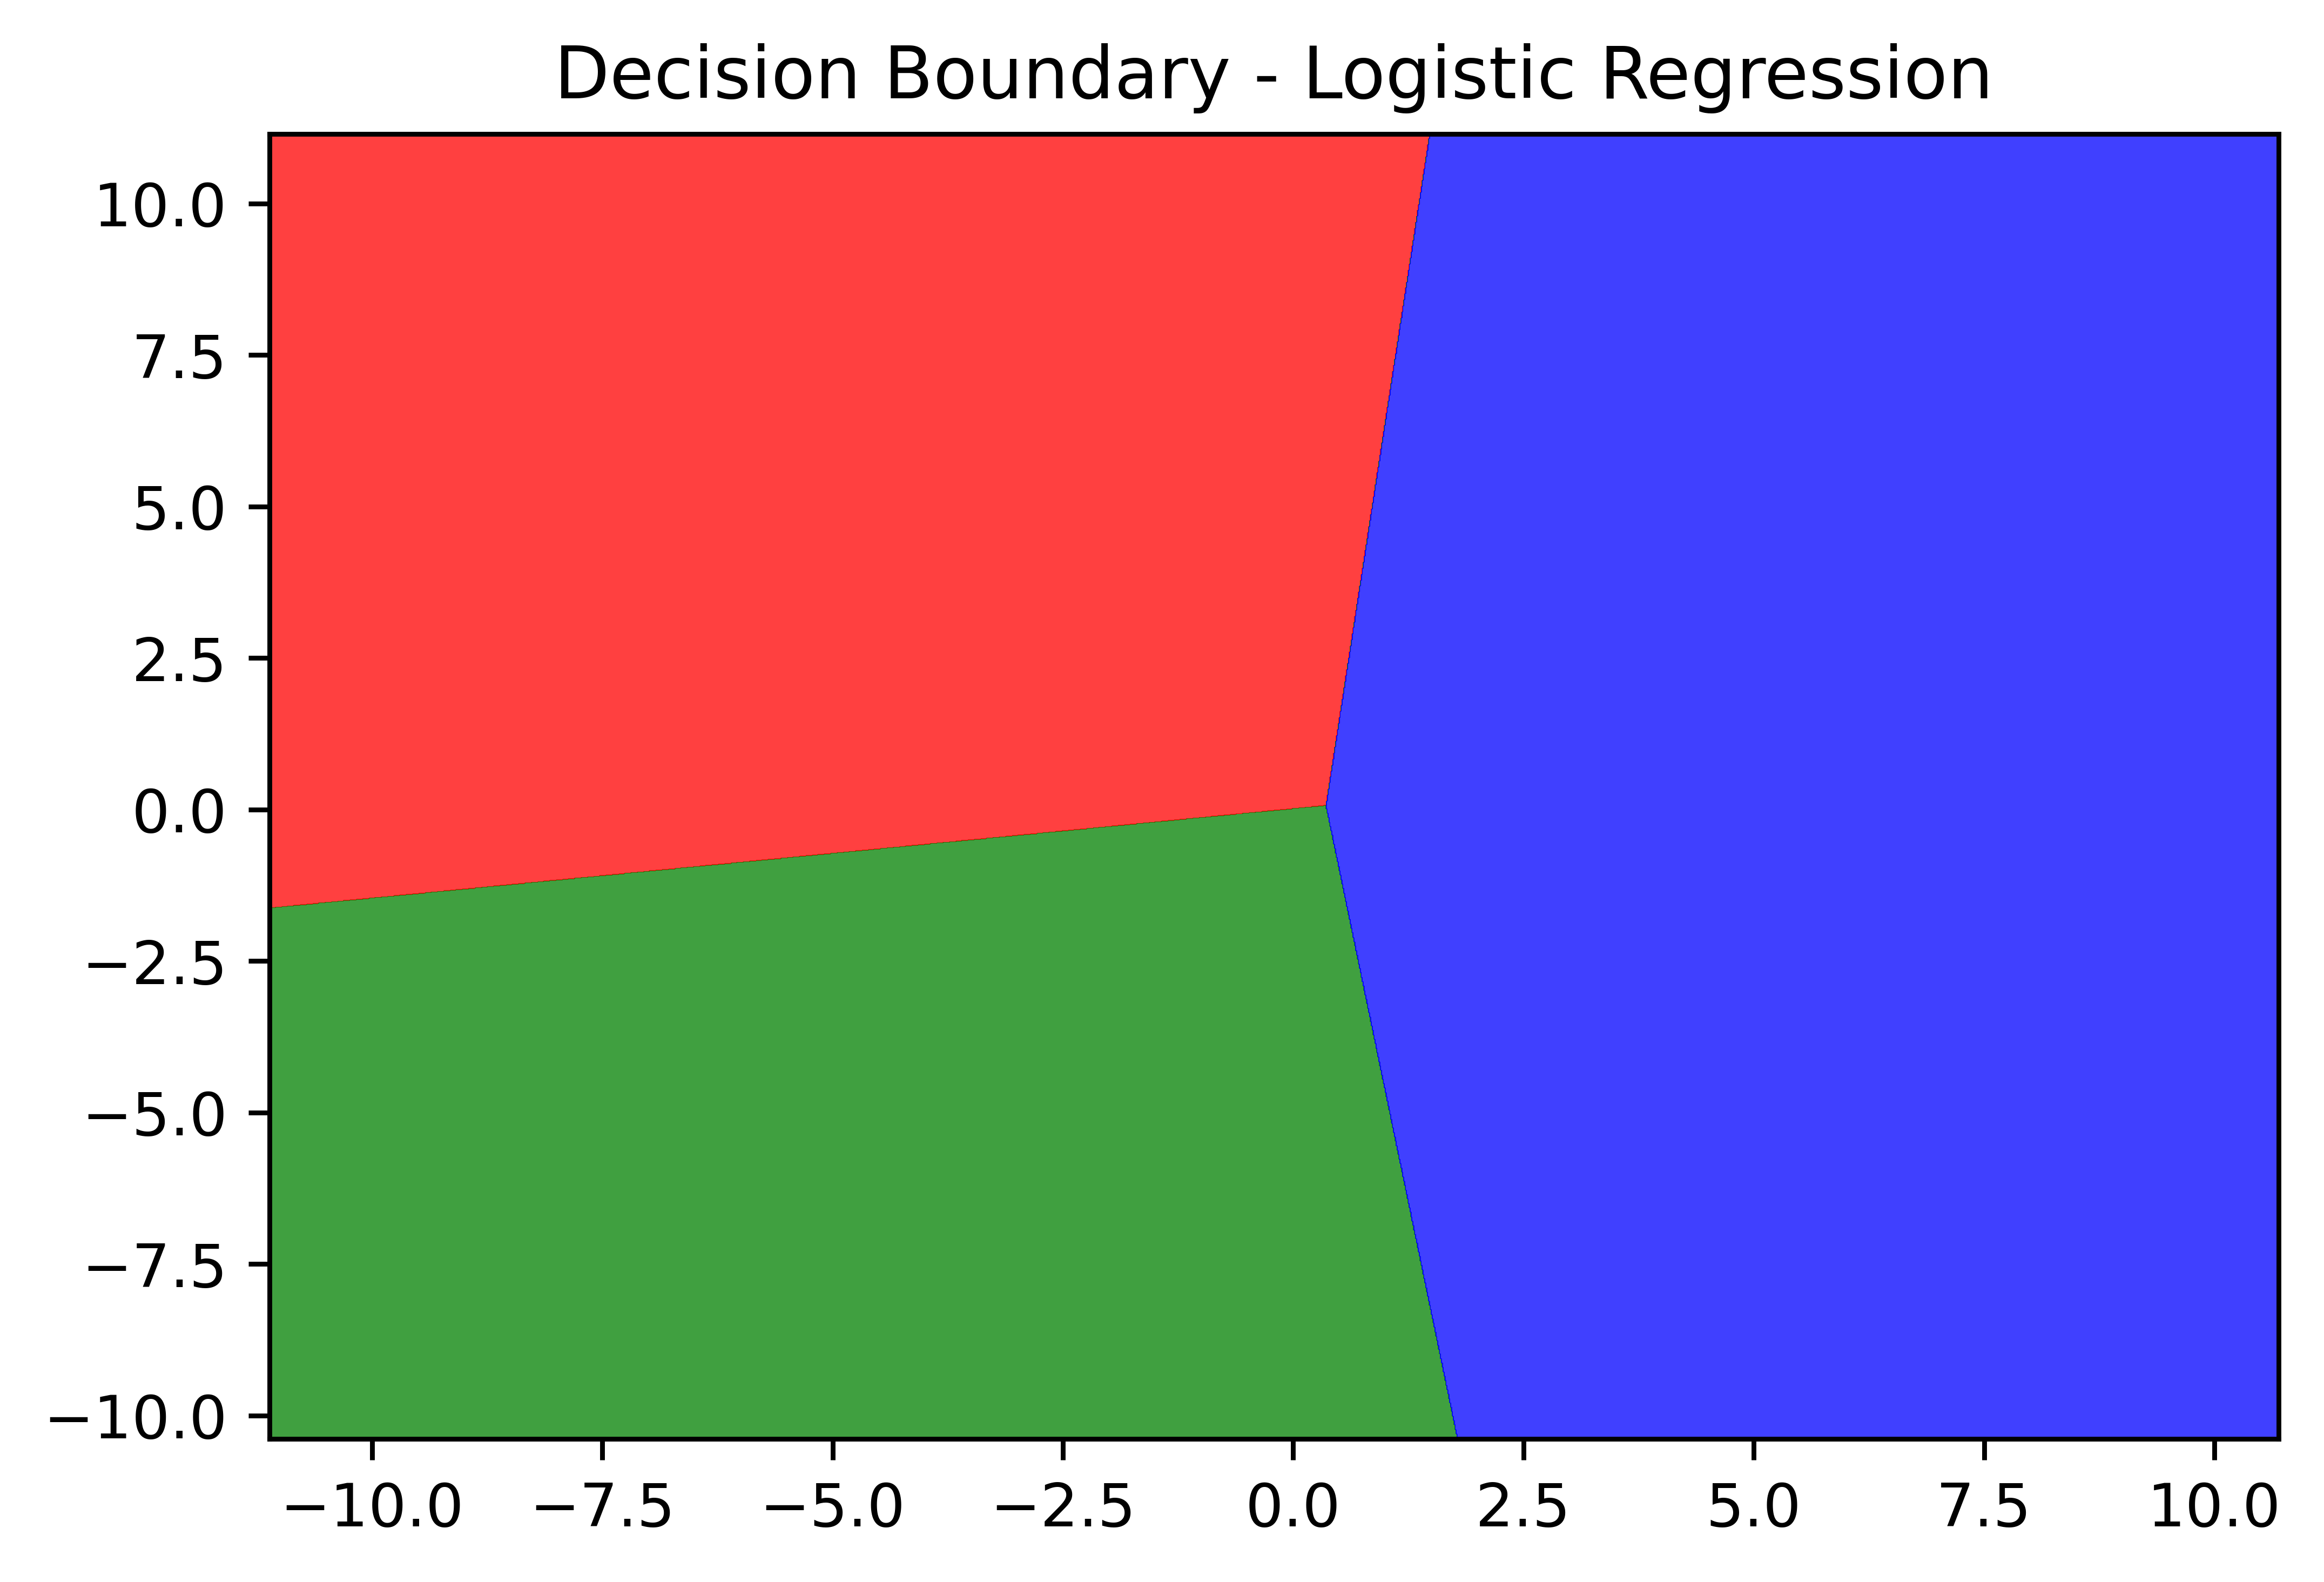

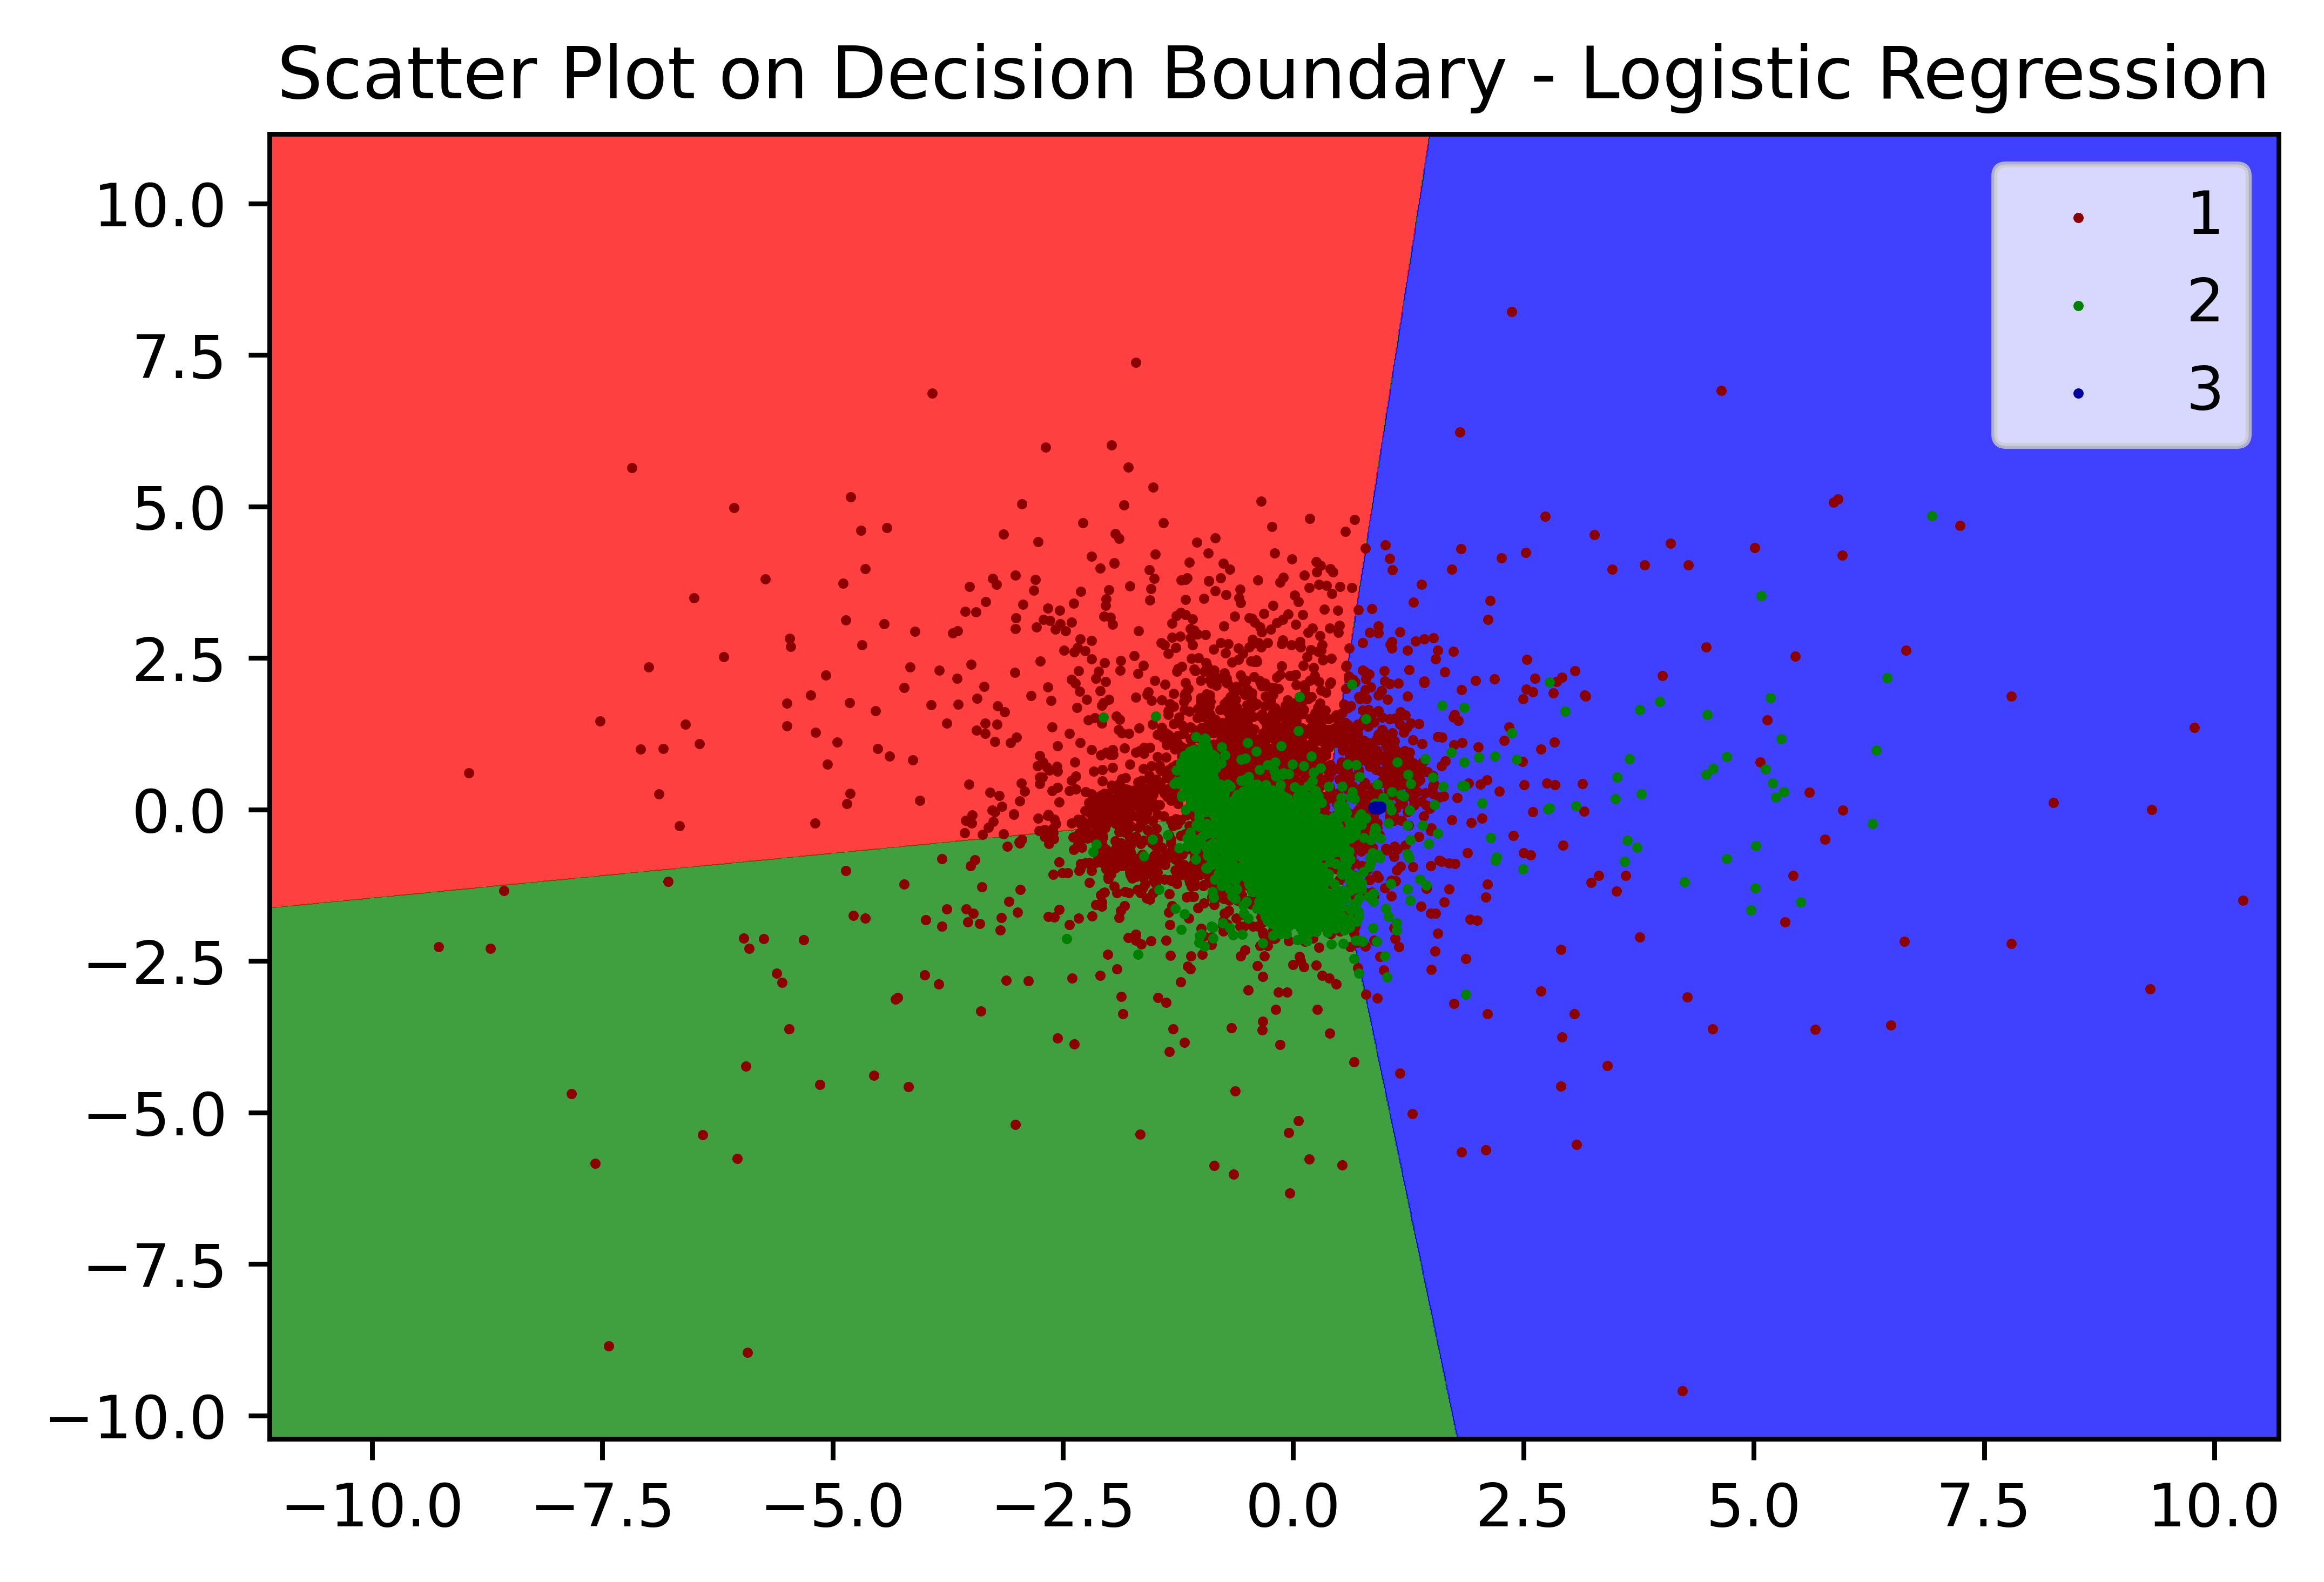

In [20]:
LDA_Plot(z_train, y_train, z_test, y_test, func = classifier_z.predict ,title = "Logistic Regression")

## k-Nearest Neighbours

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier_kNN = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
classifier_kNN.fit(x_train, y_train)

y_pred = classifier_kNN.predict(x_train)

In [22]:
#Confusion Matrix & Accuracy for evaluating the model for training data

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Train Data): \n", cm)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy (Train Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Train Data): 
 [[9324  422   11]
 [ 202 9439    0]
 [   0    0 9348]]
Accuracy (Train Data): 97.79 %


In [23]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Train Data: ", sen[0])
print("Sensitivity of Non-Fall for Train Data: ", sen[1])
print("Sensitivity of Rest for Train Data: ", sen[2])
print("Sensitivity of Train Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Train Data: ", spec[0] )
print("Specificity of Non-Fall for Train Data: ",  spec[1] )
print("Specificity of Rest for Train Data: ",  spec[2])
print("Specificity of Train Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Train Data:  0.978794877178249
Sensitivity of Non-Fall for Train Data:  0.9572051516073421
Sensitivity of Rest for Train Data:  0.998824660754354
Sensitivity of Train Data:  97.8274896513315 %
Specificity of Fall for Train Data:  0.977471383975026
Specificity of Non-Fall for Train Data:  0.9887212073073868
Specificity of Rest for Train Data:  0.9678134832619797
Specificity of Train Data:  97.80020248481308 %


In [24]:
# Confusion Matrix & Accuracy for evaluating the model for test data

y_pred = classifier_kNN.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Test Data): 
 [[3040  169    2]
 [  59 3220    0]
 [   0    0 3092]]
Accuracy (Test Data): 97.60 %


In [25]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Test Data: ", sen[0])
print("Sensitivity of Non-Fall for Test Data: ", sen[1])
print("Sensitivity of Rest for Test Data: ", sen[2])
print("Sensitivity of Test Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Test Data: ", spec[0] )
print("Specificity of Non-Fall for Test Data: ",  spec[1] )
print("Specificity of Rest for Test Data: ",  spec[2])
print("Specificity of Test Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Test Data:  0.9809616005162956
Sensitivity of Non-Fall for Test Data:  0.9501327825317203
Sensitivity of Rest for Test Data:  0.9993535875888817
Sensitivity of Test Data:  97.68159902122991 %
Specificity of Fall for Test Data:  0.973623322535863
Specificity of Non-Fall for Test Data:  0.9901501695462619
Specificity of Rest for Test Data:  0.9648581997533908
Specificity of Test Data:  97.6210563945172 %


In [26]:
# 10_Fold CV accuracy

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_kNN, X=x_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 97.25 %
Std of Accuracies:  0.00247400840637551


In [27]:
# Checking the optimal value of k such that, good amount of variance is retained
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)
explained_variance = lda.explained_variance_ratio_

# explained_variance gives us the non-cummulative value of the varaince retained
variance_retained = 0

# Finding the variance retained for decrease in principal components
for k, evr in enumerate(explained_variance):
    variance_retained += evr 
    print("No. of Principal Components: ", k, " Explained Variance Ratio: {:.4f}".format(evr), " Variance Retained: {:.2f} %".format(variance_retained*100))
    if (variance_retained >= 0.98):
        # Finding the smallest value of k such that 98% of the variance is reatined
        break

No. of Principal Components:  0  Explained Variance Ratio: 0.8792  Variance Retained: 87.92 %
No. of Principal Components:  1  Explained Variance Ratio: 0.1208  Variance Retained: 100.00 %


In [28]:
# Choosing k, such that 98% of the variance is reatined.
# But, here even for k = 1, 100% variance is retained. So, for better data visualisation k=2 is chosen
lda = LDA(n_components=2)
# Transforming z_train & z_test using the new reduced dimension vector (U_reduce)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)

In [29]:
# Analysing the SVM model fit with z_train

classifier_z = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
classifier_z.fit(z_train, y_train)
y_z_pred = classifier_z.predict(z_train)

In [30]:
cm = confusion_matrix(y_z_pred, y_train)
print("Confustion Matrix (Z-Train Data): \n", cm)
accuracy = accuracy_score(y_train, y_z_pred)
print("Accuracy (Z-Train Data): {:.2f} %".format(accuracy*100))

Confustion Matrix (Z-Train Data): 
 [[8389 1252    0]
 [1348 8386    0]
 [  20    3 9348]]
Accuracy (Z-Train Data): 90.88 %


In [31]:
y_z_pred = classifier_z.predict(z_test)

cm = confusion_matrix(y_test, y_z_pred)
print("Confusion Matrix (Z-Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_z_pred)
print("Accuracy (Z-Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Z-Test Data): 
 [[2651  554    6]
 [ 525 2754    0]
 [   0    0 3092]]
Accuracy (Z-Test Data): 88.68 %


In [32]:
# 10_Fold CV accuracy

z_inp = lda.transform(x_inp)

accuracies = cross_val_score(estimator=classifier_z, X=z_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 87.04 %
Std of Accuracies:  0.004299824336270687


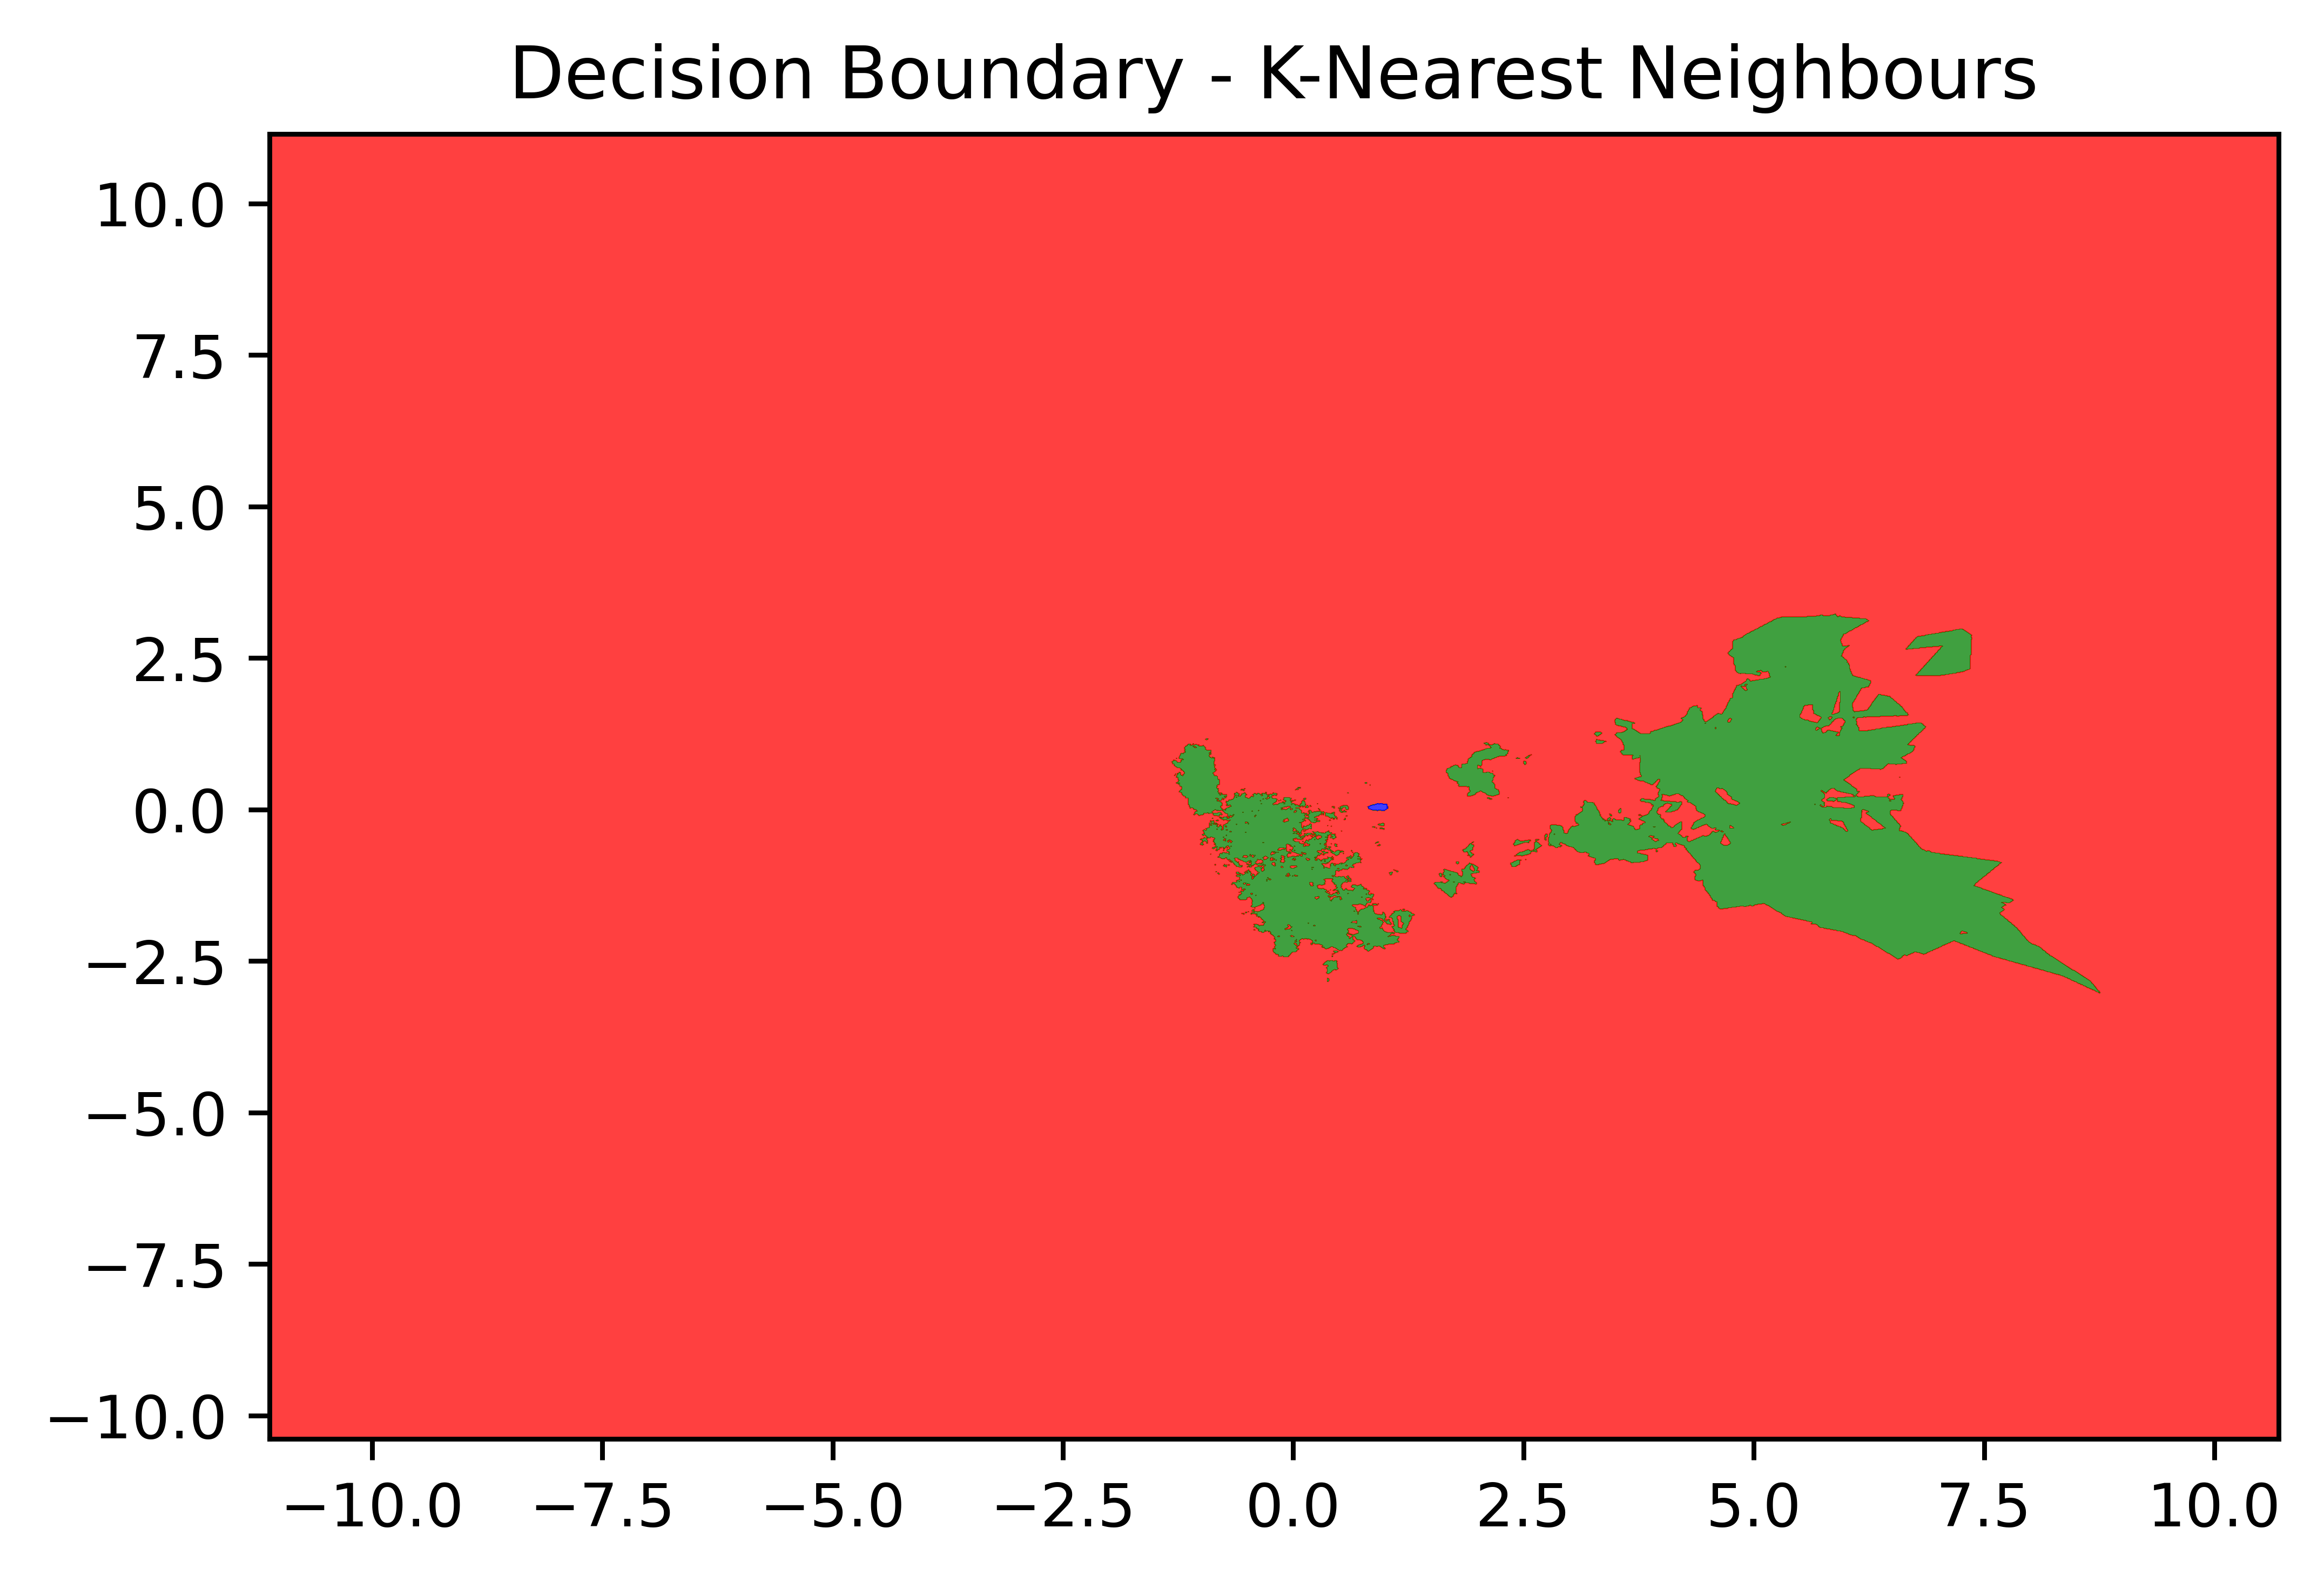

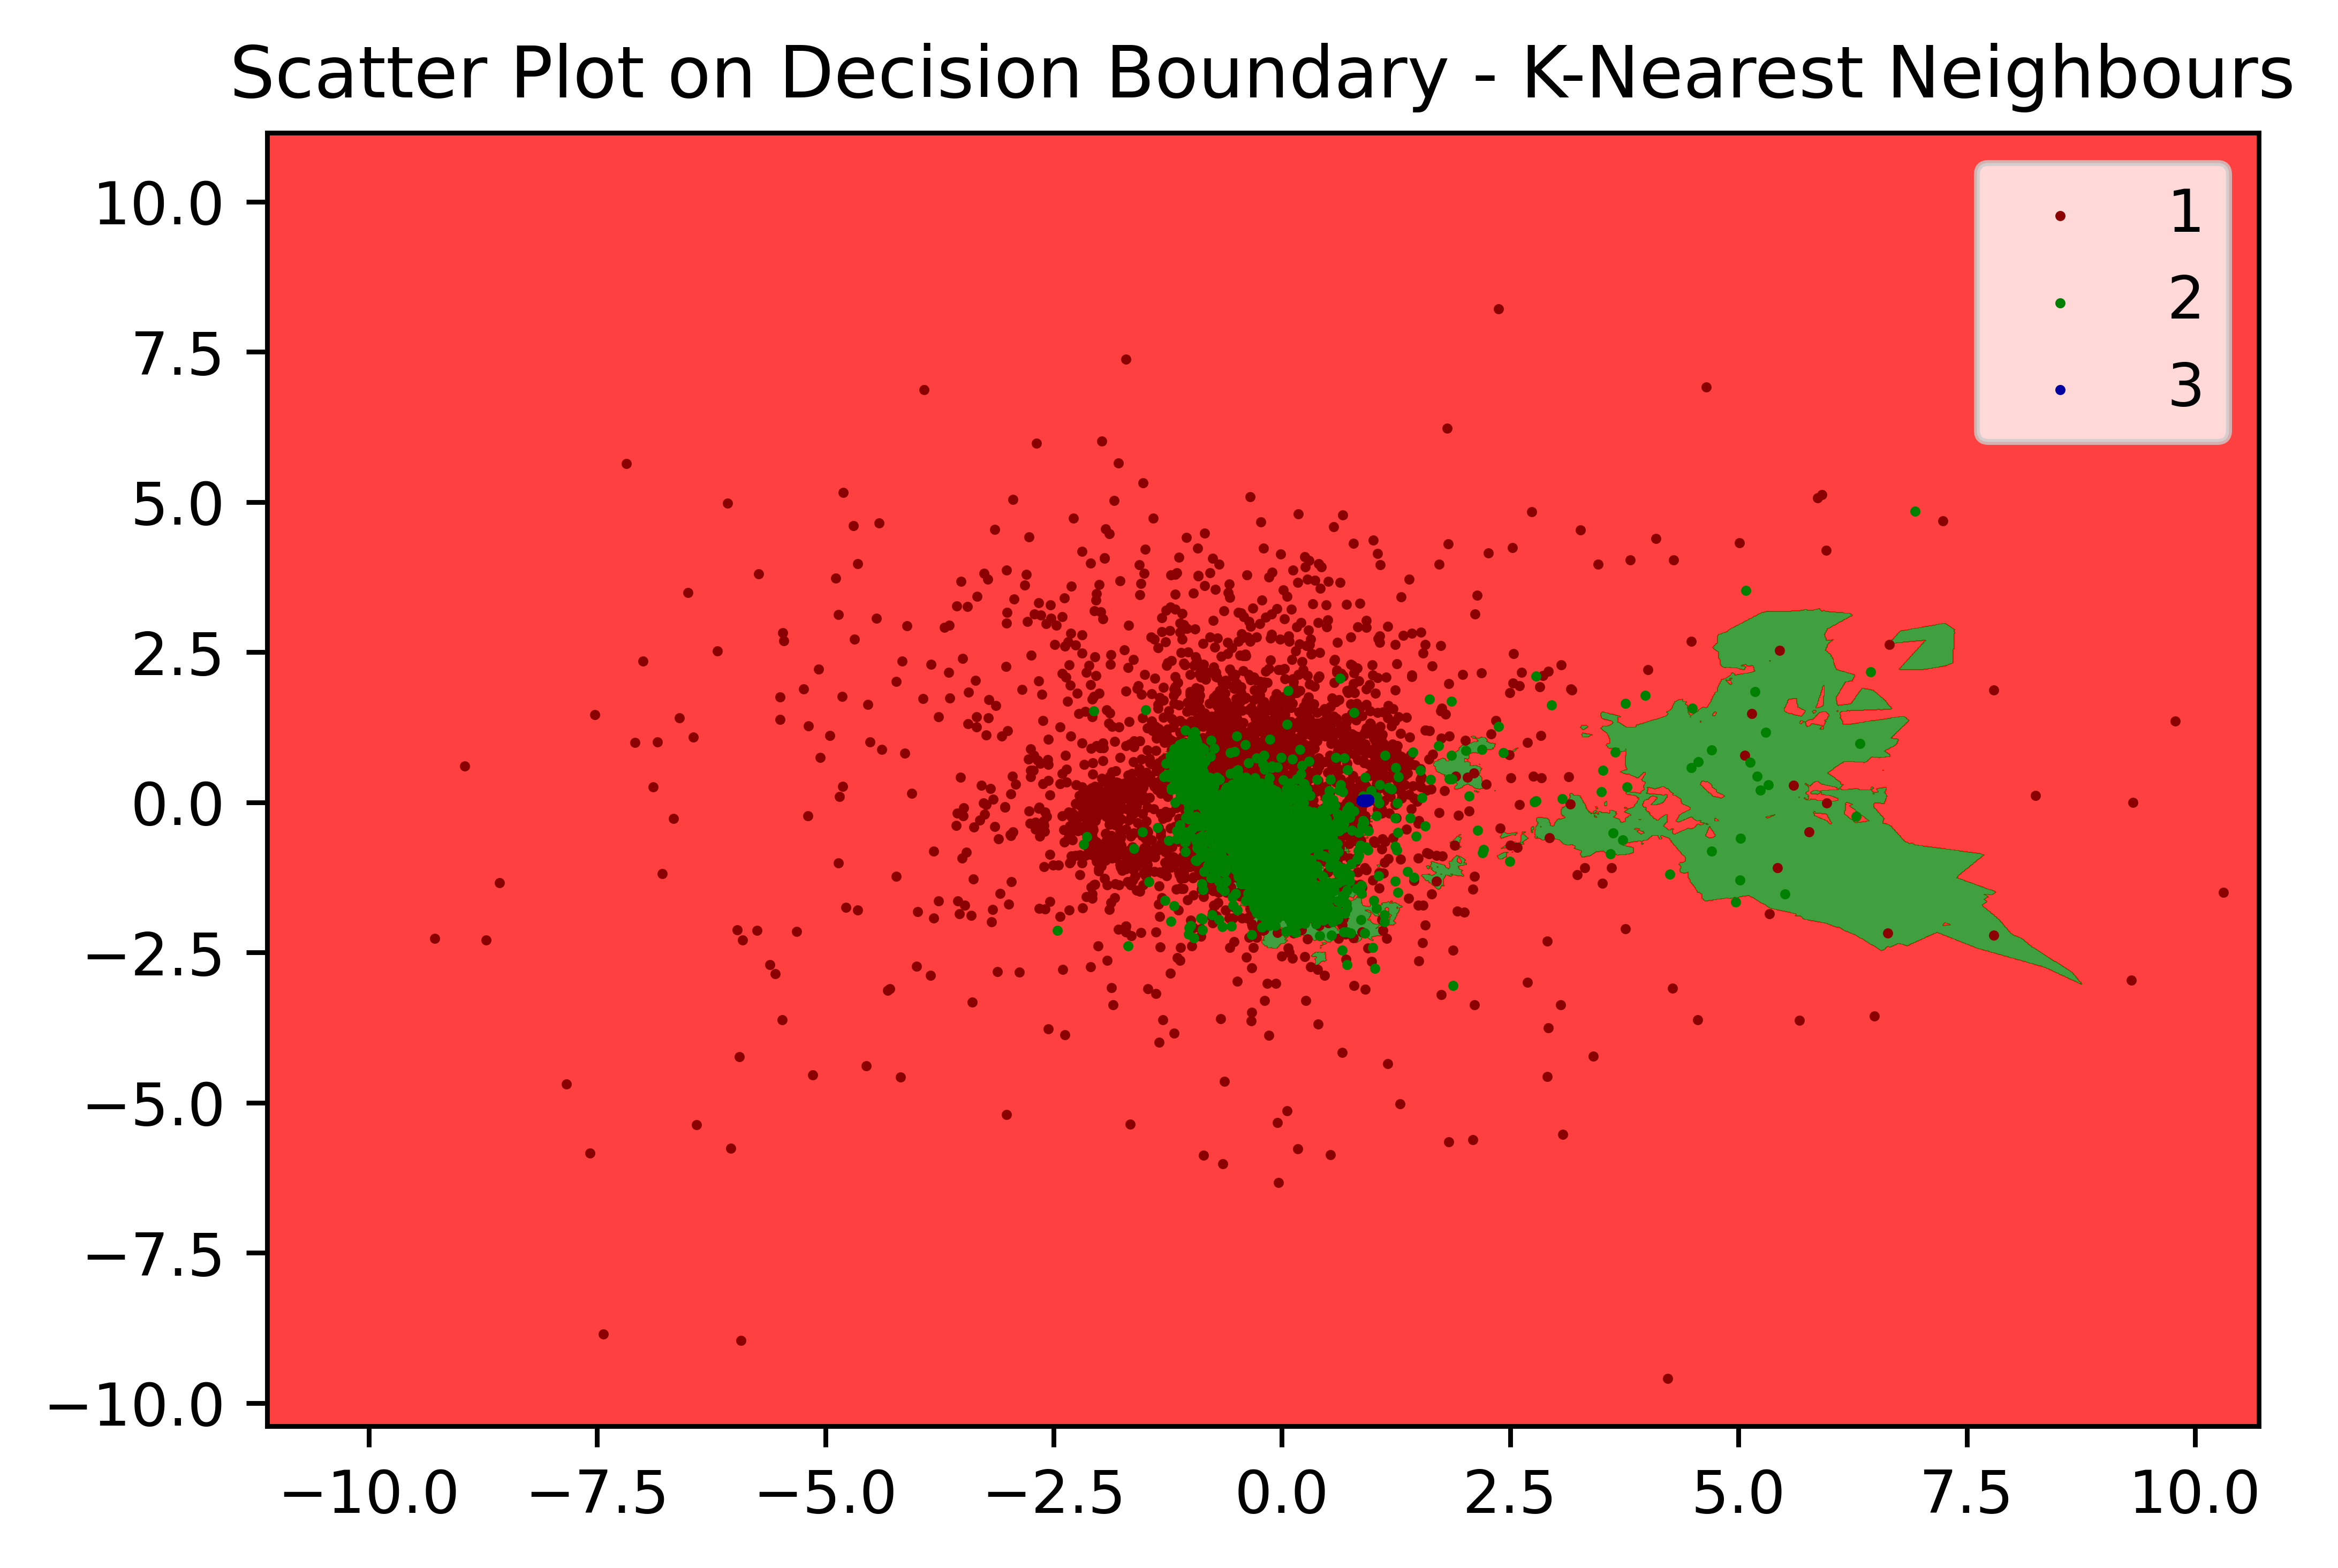

In [33]:
LDA_Plot(z_train, y_train, z_test, y_test, func = classifier_z.predict ,title = "K-Nearest Neighbours")

## Kernel SVM

In [34]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state=0) # rbf (Radial Basis function) is same as gaussian kernel 
classifier_svm.fit(x_train, y_train)

y_pred = classifier_svm.predict(x_train)

In [35]:
#Confusion Matrix & Accuracy for evaluating the model for training data

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Train Data): \n", cm)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy (Train Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Train Data): 
 [[9079  557  121]
 [ 238 9403    0]
 [   0    0 9348]]
Accuracy (Train Data): 96.81 %


In [36]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Train Data: ", sen[0])
print("Sensitivity of Non-Fall for Train Data: ", sen[1])
print("Sensitivity of Rest for Train Data: ", sen[2])
print("Sensitivity of Train Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Train Data: ", spec[0] )
print("Specificity of Non-Fall for Train Data: ",  spec[1] )
print("Specificity of Rest for Train Data: ",  spec[2])
print("Specificity of Train Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Train Data:  0.9744552967693464
Sensitivity of Non-Fall for Train Data:  0.9440763052208835
Sensitivity of Rest for Train Data:  0.9872214594994192
Sensitivity of Train Data:  96.8584353829883 %
Specificity of Fall for Train Data:  0.9651037109475527
Specificity of Non-Fall for Train Data:  0.9808900244863196
Specificity of Rest for Train Data:  0.9587591430201795
Specificity of Train Data:  96.82509594846839 %


In [37]:
# Confusion Matrix & Accuracy for evaluating the model for test data

y_pred = classifier_svm.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Test Data): 
 [[2976  199   36]
 [  74 3205    0]
 [   0    0 3092]]
Accuracy (Test Data): 96.78 %


In [38]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Test Data: ", sen[0])
print("Sensitivity of Non-Fall for Test Data: ", sen[1])
print("Sensitivity of Rest for Test Data: ", sen[2])
print("Sensitivity of Test Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Test Data: ", spec[0] )
print("Specificity of Non-Fall for Test Data: ",  spec[1] )
print("Specificity of Rest for Test Data: ",  spec[2])
print("Specificity of Test Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Test Data:  0.9757377049180328
Sensitivity of Non-Fall for Test Data:  0.9415393654524089
Sensitivity of Rest for Test Data:  0.9884910485933504
Sensitivity of Test Data:  96.85893729879308 %
Specificity of Fall for Test Data:  0.9640232700551132
Specificity of Non-Fall for Test Data:  0.9821948850760764
Specificity of Rest for Test Data:  0.9577006507592191
Specificity of Test Data:  96.79729352968029 %


In [39]:
# 10_Fold CV accuracy

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_svm, X=x_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 96.08 %
Std of Accuracies:  0.00255068226818606


In [40]:
# Checking the optimal value of k such that, good amount of variance is retained
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)
explained_variance = lda.explained_variance_ratio_

# explained_variance gives us the non-cummulative value of the varaince retained
variance_retained = 0

# Finding the variance retained for decrease in principal components
for k, evr in enumerate(explained_variance):
    variance_retained += evr 
    print("No. of Principal Components: ", k, " Explained Variance Ratio: {:.4f}".format(evr), " Variance Retained: {:.2f} %".format(variance_retained*100))
    if (variance_retained >= 0.98):
        # Finding the smallest value of k such that 98% of the variance is reatined
        break

No. of Principal Components:  0  Explained Variance Ratio: 0.8792  Variance Retained: 87.92 %
No. of Principal Components:  1  Explained Variance Ratio: 0.1208  Variance Retained: 100.00 %


In [41]:
# Choosing k, such that 98% of the variance is reatined.
# But, here even for k = 1, 100% variance is retained. So, for better data visualisation k=2 is chosen
lda = LDA(n_components=2)
# Transforming z_train & z_test using the new reduced dimension vector (U_reduce)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)

In [42]:
# Analysing the SVM model fit with z_train

classifier_z = SVC(kernel = 'rbf', random_state=0)
classifier_z.fit(z_train, y_train)
y_z_pred = classifier_z.predict(z_train)

In [43]:
cm = confusion_matrix(y_z_pred, y_train)
print("Confustion Matrix (Z-Train Data): \n", cm)

accuracy = accuracy_score(y_train, y_z_pred)
print("Accuracy (Z-Train Data): {:.2f} %".format(accuracy*100))

Confustion Matrix (Z-Train Data): 
 [[7119  741    0]
 [2417 8853    0]
 [ 221   47 9348]]
Accuracy (Z-Train Data): 88.08 %


In [44]:
y_z_pred = classifier_z.predict(z_test)

cm = confusion_matrix(y_test, y_z_pred)
print("Confusion Matrix (Z-Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_z_pred)
print("Accuracy (Z-Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Z-Test Data): 
 [[2329  807   75]
 [ 268 3000   11]
 [   0    0 3092]]
Accuracy (Z-Test Data): 87.88 %


In [45]:
# 10_Fold CV accuracy

z_inp = lda.transform(x_inp)

accuracies = cross_val_score(estimator=classifier_z, X=z_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 86.51 %
Std of Accuracies:  0.005863161828904934


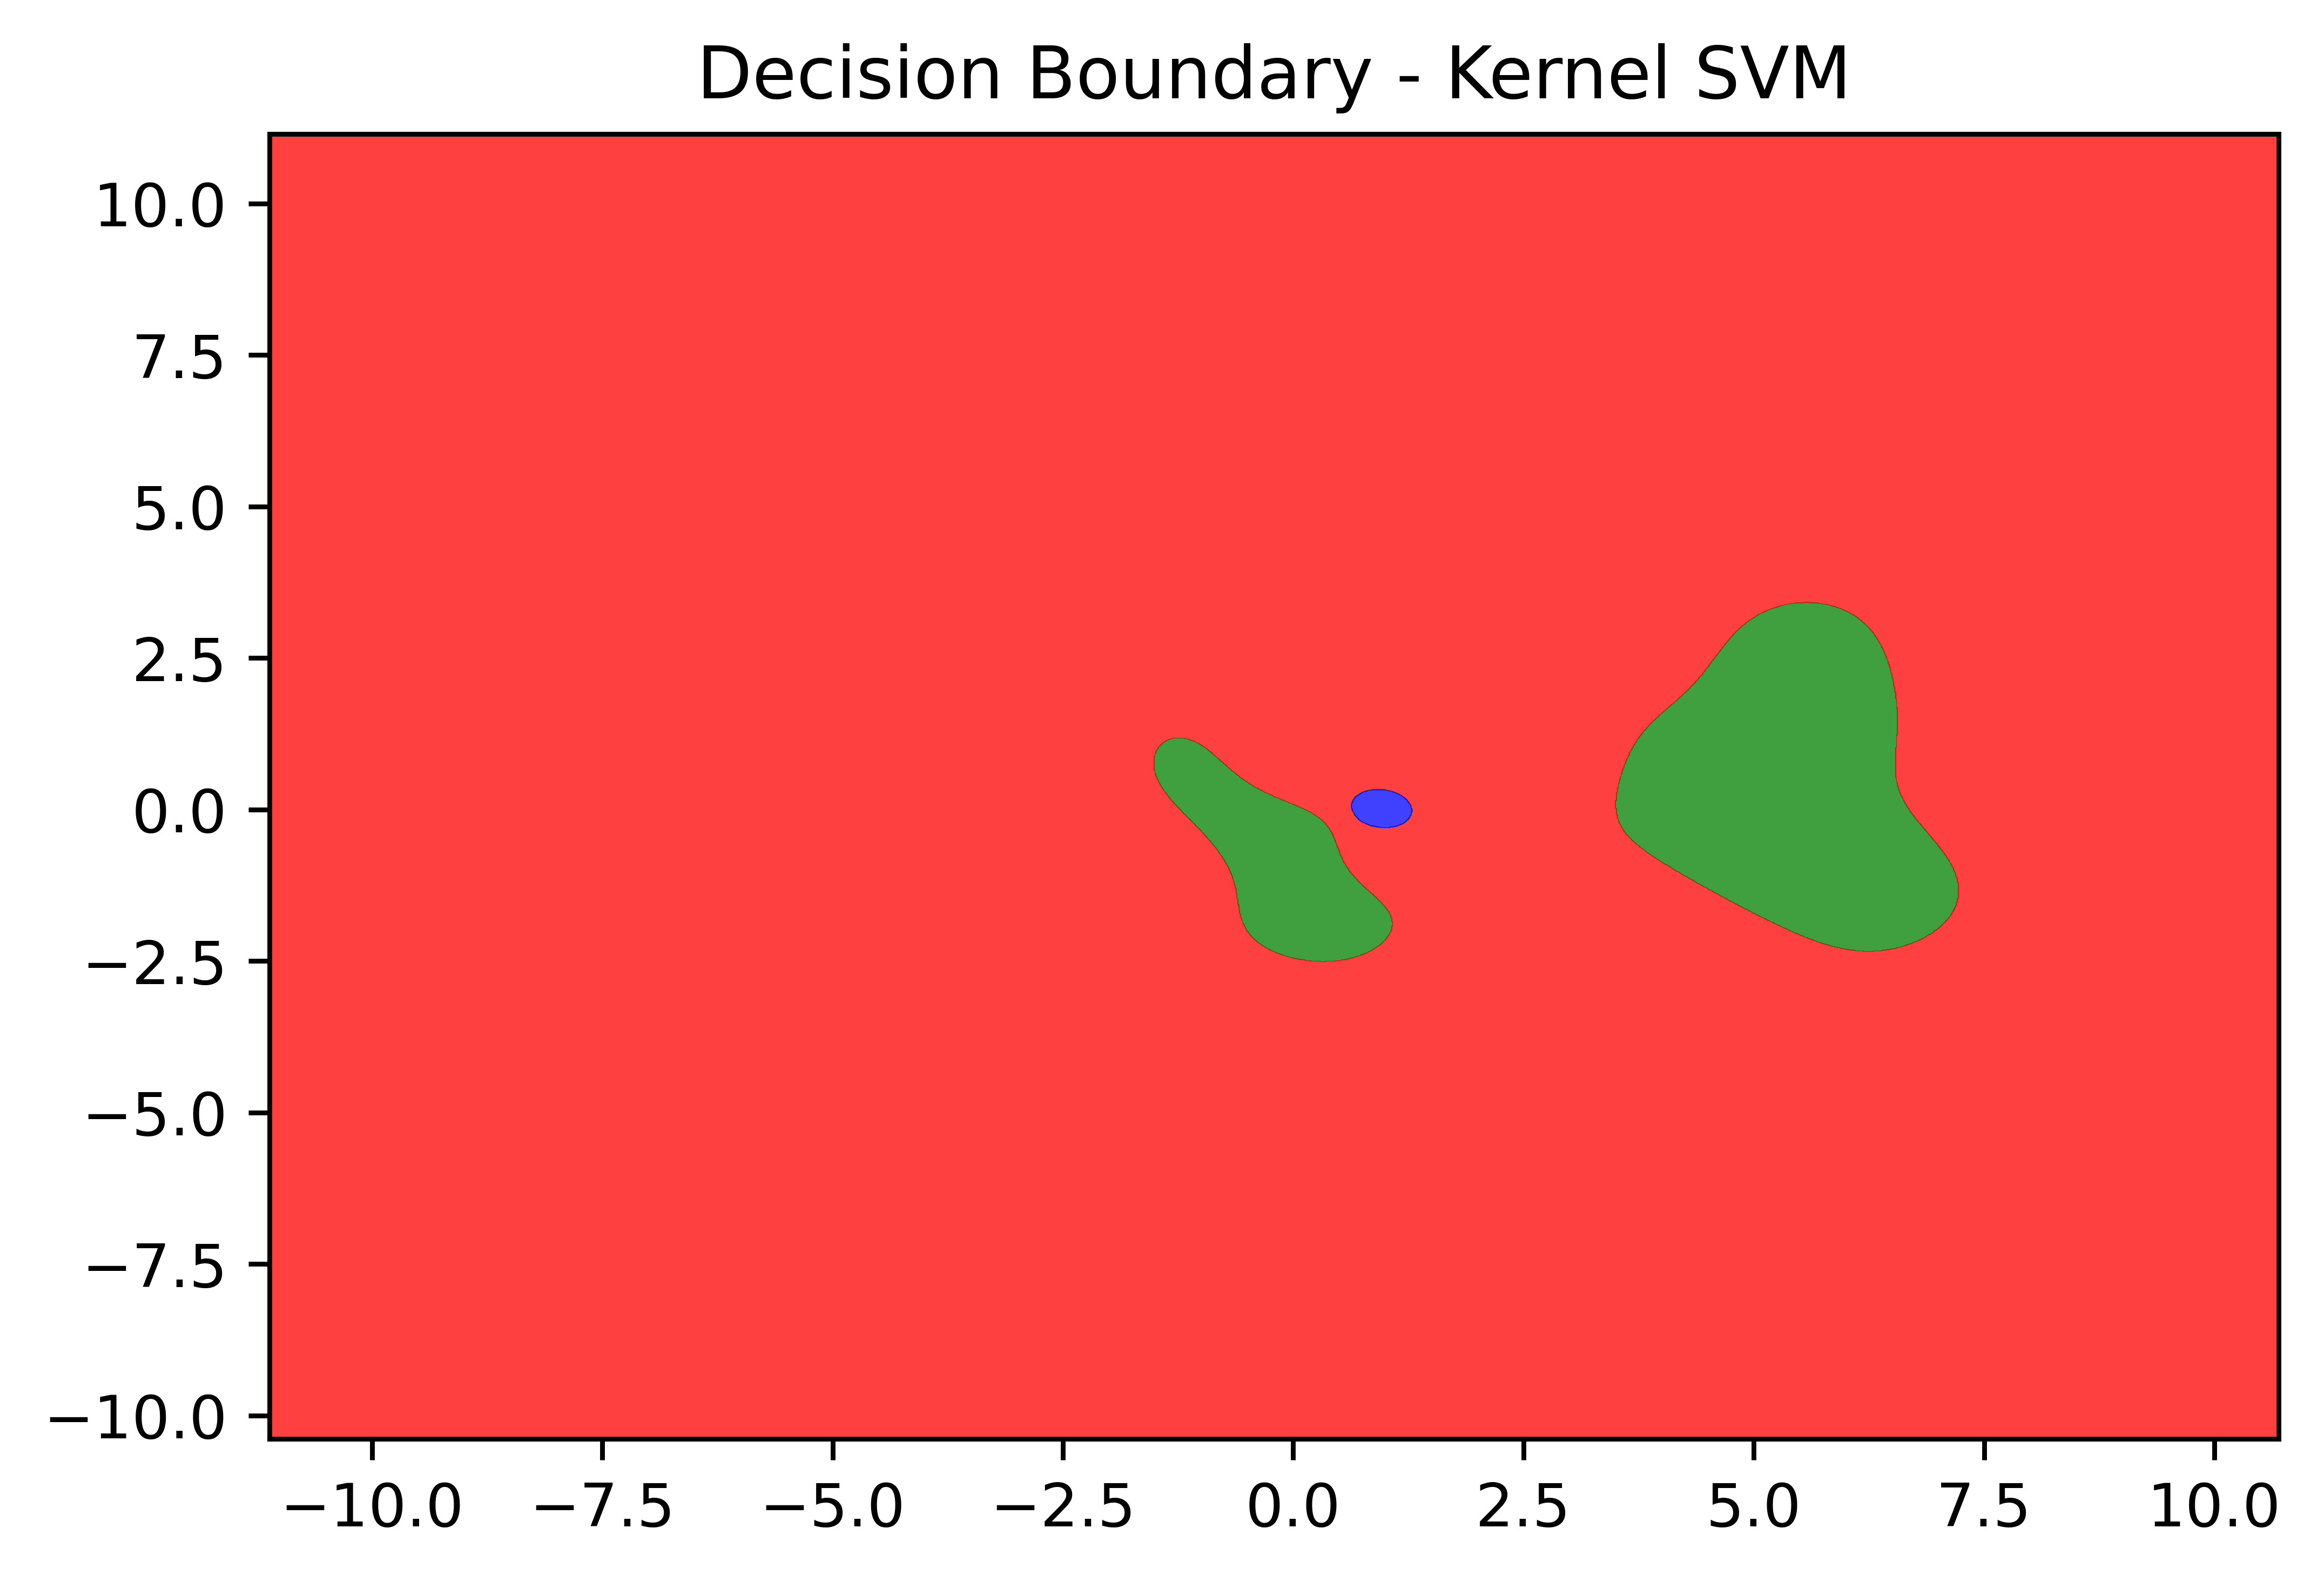

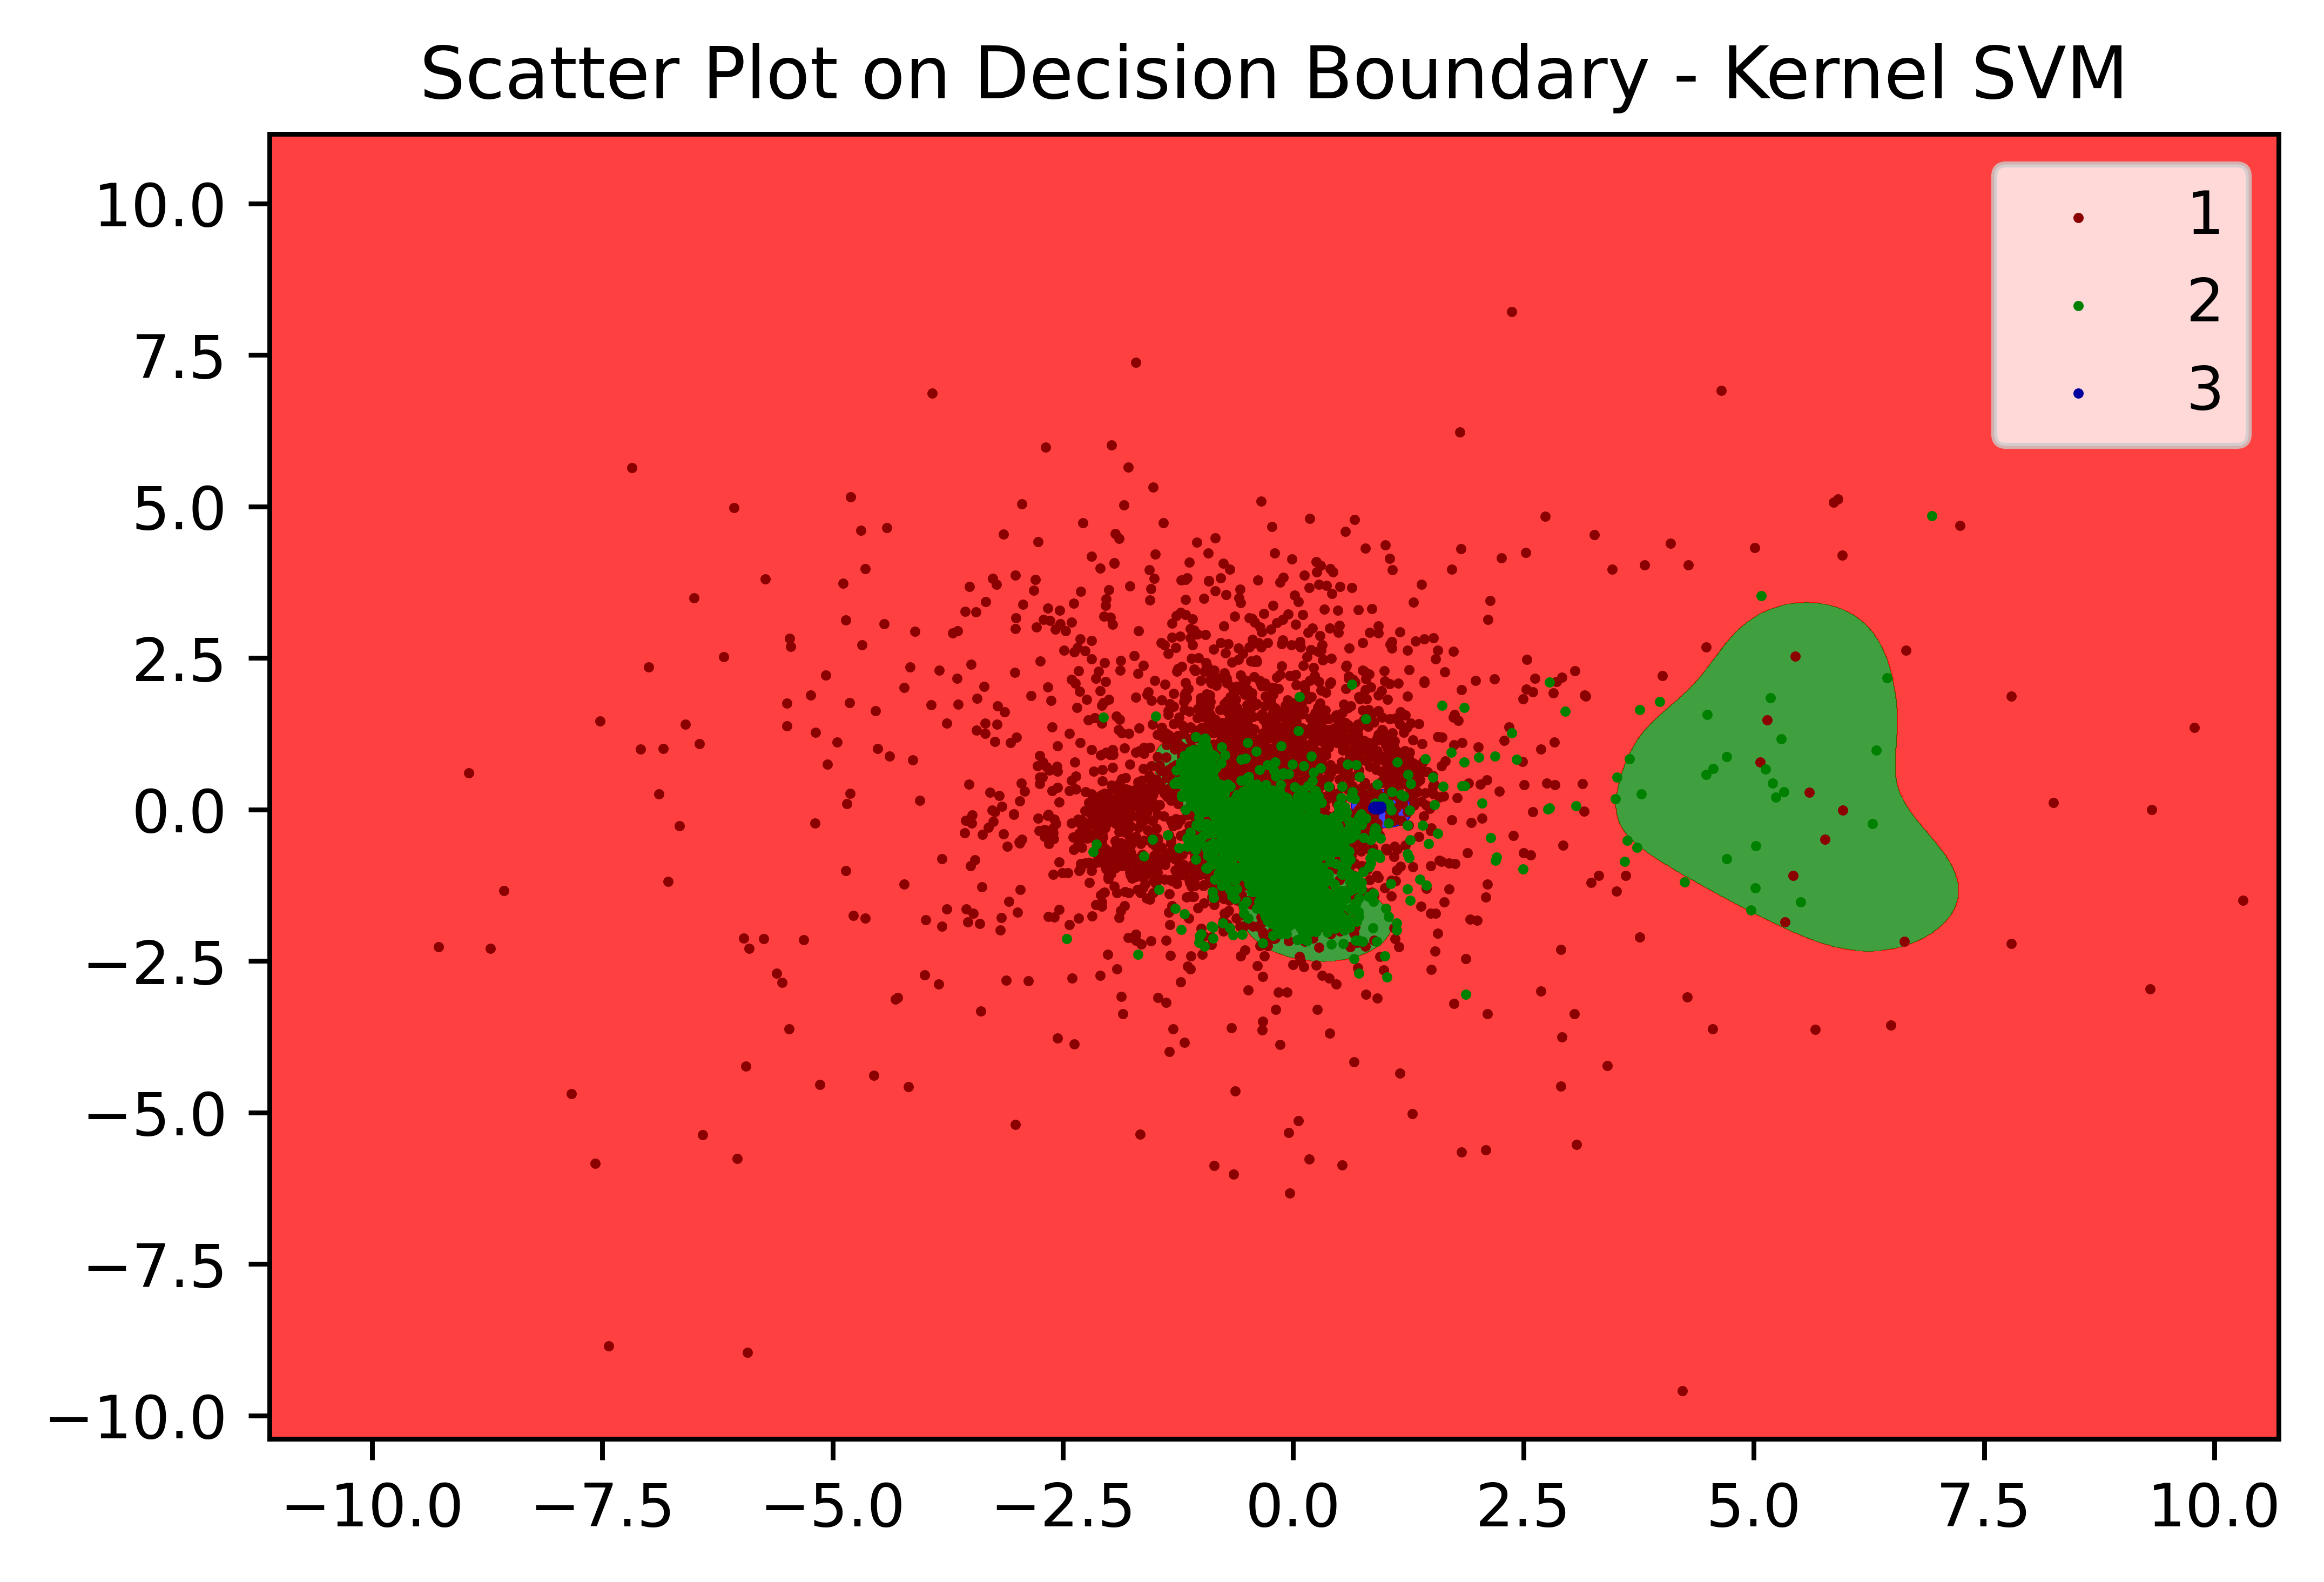

In [46]:
LDA_Plot(z_train, y_train, z_test, y_test, func = classifier_z.predict ,title = "Kernel SVM")